                                      Name Platform  Year_of_Release  \
0                               Wii Sports      Wii           2006.0   
1                        Super Mario Bros.      NES           1985.0   
2                           Mario Kart Wii      Wii           2008.0   
3                        Wii Sports Resort      Wii           2009.0   
4                 Pokemon Red/Pokemon Blue       GB           1996.0   
..                                     ...      ...              ...   
95  Crash Bandicoot 2: Cortex Strikes Back       PS           1997.0   
96     Super Smash Bros. for Wii U and 3DS      3DS           2014.0   
97                    Super Mario Galaxy 2      Wii           2010.0   
98                     Super Mario Bros. 2      NES           1988.0   
99               Call of Duty: Black Ops 3     XOne           2015.0   

           Genre                    Publisher  NA_Sales  EU_Sales  JP_Sales  \
0         Sports                     Nintendo     41.36 

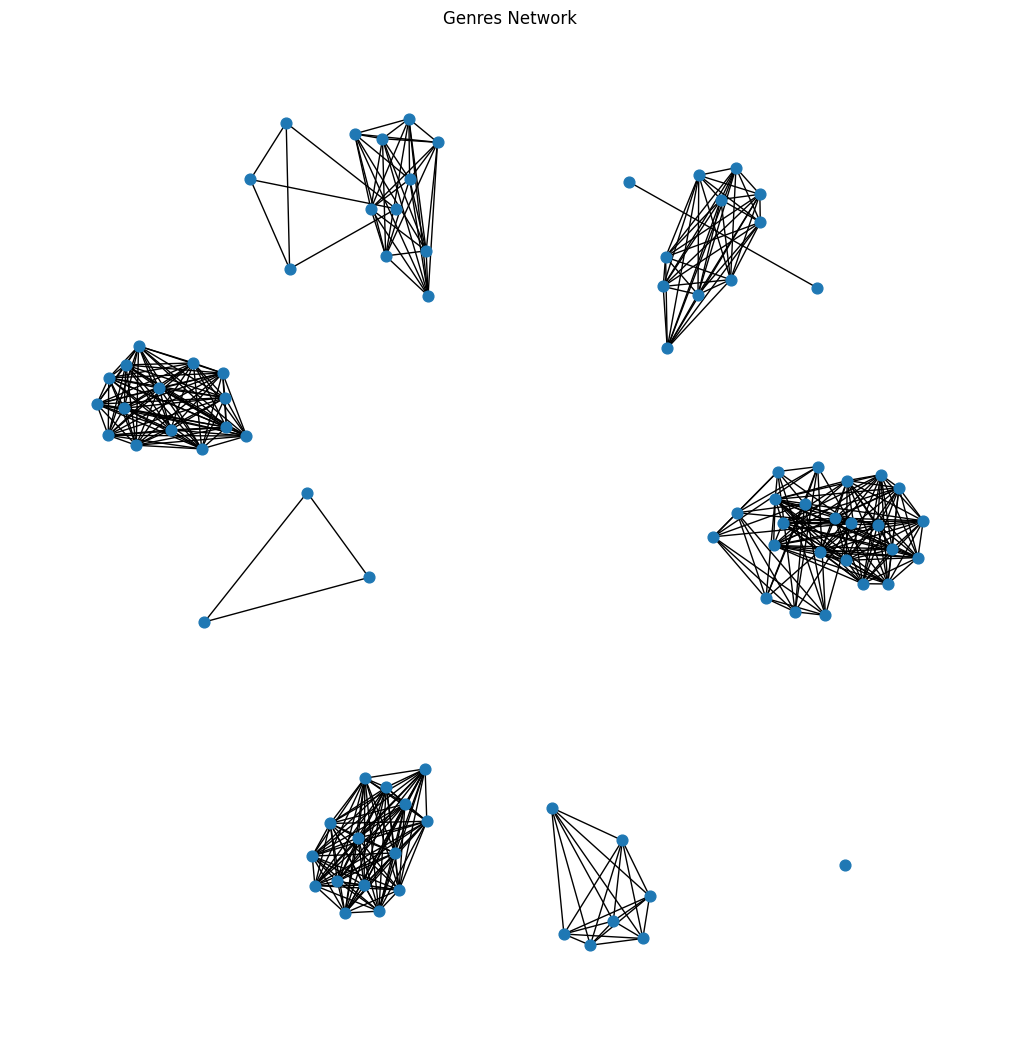

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Carregar o dataset
df = pd.read_csv('data_game.csv')
#Slecionando as 100 primeiras linhas para uma análise
df = df.head(100) 

print(df)

# Criar um grafo vazio
G = nx.Graph()

# Adicionar nós e arestas com base no gênero
for _, row in df.iterrows():
    genre = row['Genre']
    name = row['Name']
    
    # Adicionar o nó para o jogo
    if not G.has_node(name):
        G.add_node(name, genre=genre)
    
    # Adicionar nós e arestas para jogos com o mesmo gênero
    for other_name in df[df['Genre'] == genre]['Name']:
        if other_name != name:
            G.add_edge(name, other_name)

print(f'Number of nodes: {G.number_of_nodes()}')
print(f'Number of edges: {G.number_of_edges()}')
                

# Desenhar o grafo
pos = nx.spring_layout(G, k=0.5, iterations=50)
plt.figure(figsize= (10,10))
nx.draw(G, pos, with_labels=False, node_size=60, font_size=8)
plt.title("Genres Network")
plt.show()


In [37]:
#Análise descritiva básica

nodes = G.nodes()
print(f'Nós da rede: {nodes}')

edges = G.edges()
print(f'Arestas da rede: {edges}')

densidade = nx.density(G)
print(f'Densidade da rede: {densidade}')



Nós da rede: ['Wii Sports', 'Wii Sports Resort', 'Wii Fit', 'Wii Fit Plus', 'FIFA 16', 'Mario & Sonic at the Olympic Games', 'FIFA 17', 'Super Mario Bros.', 'New Super Mario Bros.', 'New Super Mario Bros. Wii', 'Super Mario World', 'Super Mario Land', 'Super Mario Bros. 3', 'Super Mario 64', 'Super Mario Galaxy', 'Super Mario 3D Land', 'Super Mario All-Stars', 'New Super Mario Bros. 2', 'Donkey Kong Country', 'Crash Bandicoot 2: Cortex Strikes Back', 'Super Mario Galaxy 2', 'Super Mario Bros. 2', 'Mario Kart Wii', 'Mario Kart DS', 'Gran Turismo 3: A-Spec', 'Mario Kart 7', 'Gran Turismo 4', 'Gran Turismo', 'Gran Turismo 5', 'Mario Kart 64', 'Gran Turismo 2', 'Super Mario Kart', 'Pokemon Red/Pokemon Blue', 'Pokemon Gold/Pokemon Silver', 'Pokemon Diamond/Pokemon Pearl', 'Pokemon Ruby/Pokemon Sapphire', 'Pokemon Black/Pokemon White', 'Pokémon Yellow: Special Pikachu Edition', 'Pokemon X/Pokemon Y', 'Pokemon Omega Ruby/Pokemon Alpha Sapphire', 'Pokemon FireRed/Pokemon LeafGreen', 'Final Fan